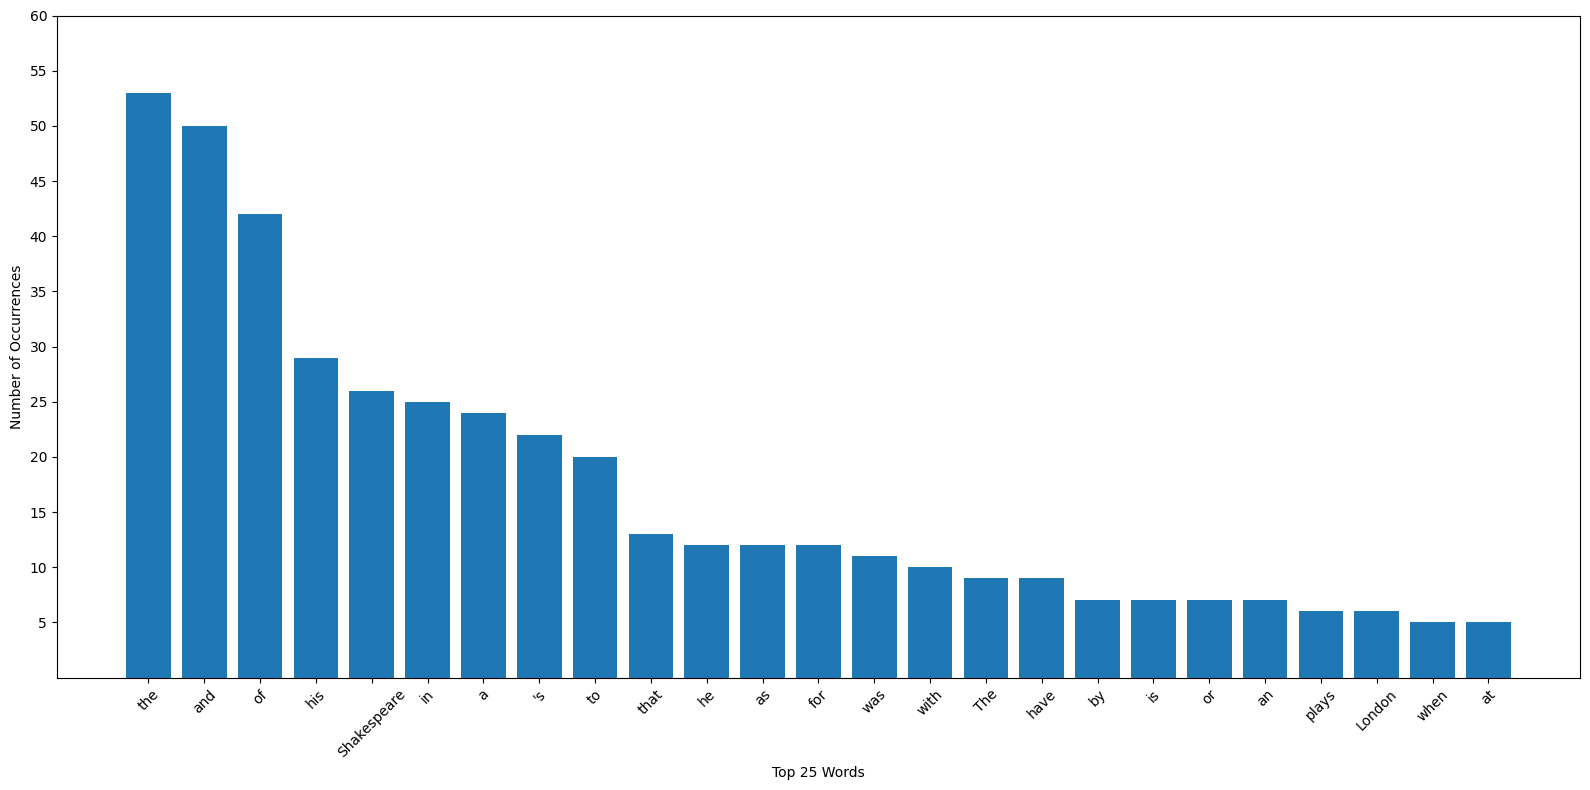

In [4]:
import nltk
import string as s
import numpy as np
import matplotlib.pyplot as plt

def word_frequency(word):
    sw = "“”````''"
    with open(word, encoding="utf-8") as f:
        content = f.read().replace("’","'")
    words = nltk.word_tokenize(content)
    words = [z for z in words if z not in s.punctuation and z not in sw]
    thisdict = {w: words.count(w) for w in set(words)}
    with open("word_frequency", "w", encoding="utf-8") as w:
        for x, y in thisdict.items():
            w.write(f"{x}, {y}\n")
    return thisdict



def find_top_words(thisdict, o):
    mydict = {}
    top_words = sorted(thisdict.items(), key=lambda item: item[1], reverse=True)[:o]
    for word, freq in top_words:
        mydict[word] = freq
    with open("top_words", "w", encoding="utf-8") as w:
        for x, y in mydict.items():
            w.write(f"{x}, {y}\n")
    return mydict

def text_analyzer_tool(word):
    n = 25
    word_freq = word_frequency(word)
    top_words = find_top_words(word_freq, 10)
    z = np.zeros(len(find_top_words(word_freq, n)))
    z[:] = list(find_top_words(word_freq, n).values())
    ls = list(find_top_words(word_freq, n).keys())
    with open("analyzed_text", "w", encoding="utf-8") as w:
        w.write(f"The top words in {word} are:\n\n")
        for x in top_words:
            w.write(f"{x}\n")
        w.write("\n")
        w.write(f"The frequency of all words in {word} are:\n\n")
        for x, y in word_freq.items():
            w.write(f"{x}, {y}\n")
    return z,ls

z,ls = text_analyzer_tool("Text")
plt.figure(figsize=(16,8))
x = plt.bar(ls, z)
plt.xticks(size=10, rotation=45)
plt.yticks(np.arange(5,65, step=5))
plt.xlabel("Top 25 Words")
plt.ylabel("Number of Occurrences")
plt.tight_layout()
plt.savefig("Graph.png")
plt.show()
